### Подключение библиотек

In [1]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV, KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler,Normalizer, StandardScaler,RobustScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold,RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import make_scorer, f1_score

import shap
from sklearn.feature_selection  import RFE


from sklearn.feature_selection import SelectPercentile

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

### Обучение и выполнение лучшей модели

In [7]:
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения (тюник в сопровождающих файлах)

In [8]:
# Путь к тренировочному набору
path_train =  'train_house.csv'
path_test  =  'test_house.csv'
path_train = pd.read_csv("train_house_С.csv") 
path_test = pd.read_csv("test_house_С.csv")
# содержит только имя файла, без имен папок !!!
df1 = path_train
X_test = path_test
df1.head()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,3605000,1.307431,0.024120,0.0,-0.070044,-0.223185,0.809239,-1.308863,-0.734539,-0.929397,...,-0.991672,-0.263991,-0.141322,-1.599013,-0.570187,-1.528627,0.780013,-0.465315,0.405623,-0.679063
1,5215000,-0.478408,-0.024866,0.0,-0.126718,-0.223185,-0.520499,0.047278,1.361397,0.224410,...,-1.104034,-0.263991,-0.141322,0.701118,-0.570187,-1.324398,0.711996,2.149083,0.405623,-0.679063
2,7700000,3.093270,1.346730,0.0,0.666712,0.624632,-0.242150,1.403419,-0.734539,2.532024,...,-1.340582,1.791369,3.136137,1.512364,1.421812,0.698373,0.311803,-0.465315,0.405623,-0.679063
3,2940000,-0.478408,-0.024866,0.0,-0.659450,-0.223185,2.340136,1.403419,-0.734539,0.224410,...,-0.730686,-0.263991,-0.141322,0.251860,-0.570187,0.108186,-0.785574,-0.465315,-2.465344,-0.679063
4,7980000,3.093270,4.285865,0.0,2.366919,2.441383,1.164113,1.403419,-0.734539,2.532024,...,-1.001475,1.791369,3.136137,-0.534651,1.421812,0.226390,1.008504,-0.465315,0.405623,1.472618


In [9]:
df = df1.drop(columns = ['1', '2','3','5','6','7','9','12','14','16','18','17','19','20','24','27'], axis = 1, inplace = True)
path_test.drop(columns = ['1', '2','3','5','6','7','9','12','14','16','18','17','19','20','24','27'], axis = 1, inplace = True)

In [10]:
display(df1)

,price,0,4,8,10,11,13,15,21,22,23,25,26,28
0,3605000,1.307431,-0.223185,-0.929397,-0.091662,-0.805741,-0.300045,-0.554035,-0.141322,-1.599013,-0.570187,0.780013,-0.465315,-0.679063
1,5215000,-0.478408,-0.223185,0.224410,-1.406286,0.355976,0.945257,1.804941,-0.141322,0.701118,-0.570187,0.711996,2.149083,-0.679063
2,7700000,3.093270,0.624632,2.532024,-0.091662,1.517692,0.391790,-0.554035,3.136137,1.512364,1.421812,0.311803,-0.465315,-0.679063
3,2940000,-0.478408,-0.223185,0.224410,1.222962,-0.805741,-0.687472,-0.554035,-0.141322,0.251860,-0.570187,-0.785574,-0.465315,-0.679063
4,7980000,3.093270,2.441383,2.532024,-1.406286,1.517692,1.775458,-0.554035,3.136137,-0.534651,1.421812,1.008504,-0.465315,1.472618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3150000,1.307431,-0.223185,-0.929397,-0.091662,-0.805741,0.737707,-0.554035,-0.141322,-1.232126,-0.570187,-0.187534,-0.465315,-0.679063
404,8645000,-0.478408,-0.223185,-0.929397,-1.406286,0.355976,1.337297,-0.554035,-0.141322,0.786281,-0.570187,0.357605,2.149083,1.472618
405,3290000,-0.478408,-0.223185,-0.929397,1.222962,0.355976,0.336443,-0.554035,-0.141322,-0.782841,-0.570187,0.796927,-0.465315,-0.679063
406,4515000,-0.478408,-0.223185,0.224410,-0.091662,0.355976,-0.784329,-0.554035,-0.141322,-1.319181,-0.570187,1.647910,-0.465315,-0.679063


In [11]:
X_train = df1.drop('price', axis = 1)
y_train = df1.price

In [12]:
numeric_features = ['0','4', '8', '10', '11',  '13', '15', '21', '23', '26', '28']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)
CT = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
).set_output(transform = 'pandas')

display(CT)

res_ct = CT.fit_transform(X_train)
X_test_scaled = CT.transform(X_test)
pd.DataFrame(X_test_scaled).head()

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['0', '4', '8', '10', '11', '13', '15', '21',
                                  '23', '26', '28'])])

,num__0,num__4,num__8,num__10,num__11,num__13,num__15,num__21,num__23,num__26,num__28
0,0.50,0.102515,0.333333,0.5,0.000000,0.083849,1.0,0.25,0.000000,1.0,0.0
1,0.50,-0.051451,0.333333,0.5,0.000000,0.065979,0.0,0.25,0.666667,0.0,0.0
2,0.75,0.102515,0.000000,0.5,0.000000,0.167010,0.0,0.25,0.000000,0.0,0.0
3,0.50,0.268085,0.333333,0.0,0.333333,0.496907,0.0,0.25,0.333333,0.0,1.0
4,0.50,0.102515,0.333333,0.5,0.000000,0.092784,0.0,0.25,0.000000,0.0,1.0


In [13]:
# Блок(и) обучения и поверки модели, а также отбора необходимых значимых столбцов

In [14]:
rfc = RandomForestRegressor(criterion='poisson', max_depth=40, max_features='sqrt', min_samples_leaf = 1,
                       n_estimators=750)
rfc.fit(res_ct,y_train)
print(rfc.score(res_ct,y_train))

0.9488005579915249


In [15]:
# Блок предсказания с использованием тестового набора

In [16]:
# Маска отобраных ** НАЗВАНИЙ СТОЛБЦОВ ** для предсказания из тестового набора
mask = ['0','4', '8', '10', '11',  '13', '15', '21', '23', '26', '28']
X_test = path_test

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = rfc.predict(X_test_scaled)
y_predict

array([3899128.82222222, 4292776.13333333, 3732927.33333333,
       7921983.25333333, 4052645.27777778, 3627100.86666667,
       5246130.58666667, 5584819.33333333, 3609598.57777778,
       5335196.22222222, 6756866.85333333, 3253791.33333333,
       3653642.4       , 4548763.95555556, 3648591.33333333,
       4240908.        , 4001330.66666667, 3539447.33333333,
       3734154.66666667, 5156830.        , 5186799.33333333,
       5481700.        , 4194138.66666667, 5561038.66666667,
       3280372.95555556, 4543783.06666667, 3696807.33333333,
       6965517.25333333, 4066766.66666667, 4503034.66666667,
       3193258.22222222, 4016740.        , 3054607.11111111,
       3244063.95555556, 3017027.06666667, 3504405.33333333,
       4312933.33333333, 2742496.4       , 5019074.66666667,
       7093501.33333333, 5749398.66666667, 2485219.33333333,
       3402121.33333333, 3459899.33333333, 4594809.77777778,
       4250064.        , 3854310.6       , 6919057.41333333,
       4239707.11111111,

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,692,839
 
----------------------
   MAPE Error: 16.76
----------------------


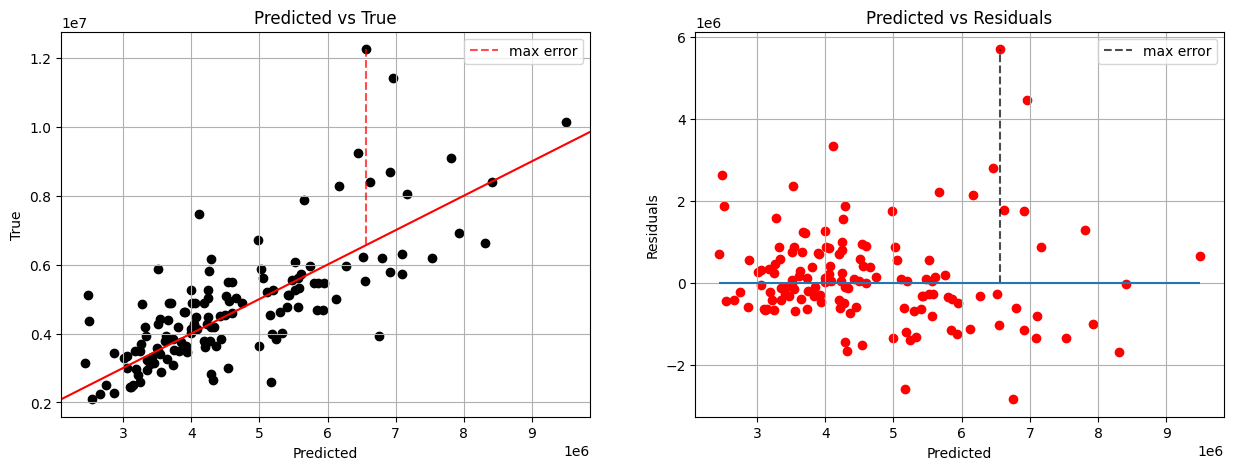

In [18]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_С.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [19]:
mask

['0', '4', '8', '10', '11', '13', '15', '21', '23', '26', '28']

In [20]:
import pickle
with open('saved_dictionary_с.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,2,1
1,28,airconditioning
2,13,area
3,4,area bathrooms
4,3,area bedrooms
5,1,area stories
6,7,basement
7,23,bathrooms
8,21,bathrooms stories
9,6,bedrooms
